In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import files
uploaded = files.upload()

Saving prices.csv to prices.csv


In [5]:
df = pd.read_csv('prices.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [7]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [8]:
df['symbol'] = pd.factorize(df['symbol'])[0]
print(df.head())

                  date  symbol        open       close         low  \
0           2016-01-05       0  123.430000  125.839996  122.309998   
1           2016-01-06       0  125.239998  119.980003  119.940002   
2           2016-01-07       0  116.379997  114.949997  114.930000   
3           2016-01-08       0  115.480003  116.620003  113.500000   
4  2016-01-11 00:00:00       0  117.010002  114.970001  114.089996   

         high     volume  
0  126.250000  2163600.0  
1  125.540001  2386400.0  
2  119.739998  2489500.0  
3  117.440002  2006300.0  
4  117.330002  1408600.0  


In [9]:
print(df.tail())

              date  symbol        open       close         low        high  \
851259  2016-12-30     465  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30     466   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30     484   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30     467   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30     500   54.200001   53.630001   53.389999   54.480000   

           volume  
851259   973800.0  
851260  1938100.0  
851261  1701200.0  
851262  1380900.0  
851263   705100.0  


In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

In [11]:
print(df.head())

         date  symbol        open       close         low        high  \
0  2016-01-05       0  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06       0  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07       0  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08       0  115.480003  116.620003  113.500000  117.440002   
4         NaT       0  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [12]:
df.isnull().sum()

,0
date,2130
symbol,0
open,0
close,0
low,0
high,0
volume,0


In [13]:
# Vérifier les lignes dupliquées
duplicates = df.duplicated()

# Afficher les lignes dupliquées
print("Lignes dupliquées :")
print(df[duplicates])

# Supprimer les lignes dupliquées
df = df.drop_duplicates()

print("\nDataFrame après suppression des duplications :")
print(df)


Lignes dupliquées :
Empty DataFrame
Columns: [date, symbol, open, close, low, high, volume]
Index: []

DataFrame après suppression des duplications :
              date  symbol        open       close         low        high  \
0       2016-01-05       0  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06       0  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07       0  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08       0  115.480003  116.620003  113.500000  117.440002   
4              NaT       0  117.010002  114.970001  114.089996  117.330002   
...            ...     ...         ...         ...         ...         ...   
851259  2016-12-30     465  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30     466   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30     484   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30     467   44.730000   45.450001   44.410000   45.59

In [14]:
# Vérifier les lignes vides (NaN)
empty_rows = df.isnull().any(axis=1)

# Afficher les lignes vides
print("Lignes vides :")
print(df[empty_rows])

# Supprimer les lignes vides
df = df.dropna()

print("\nDataFrame après suppression des lignes vides :")
print(df)

Lignes vides :
       date  symbol        open       close         low        high     volume
4       NaT       0  117.010002  114.970001  114.089996  117.330002  1408600.0
5       NaT       0  115.510002  115.550003  114.500000  116.059998  1098000.0
6       NaT       0  116.459999  112.849998  112.589996  117.070000   949600.0
7       NaT       0  113.510002  114.379997  110.050003  115.029999   785300.0
8       NaT       0  113.330002  112.529999  111.919998  114.879997  1093700.0
...     ...     ...         ...         ...         ...         ...        ...
849763  NaT     500   54.750000   54.459999   54.110001   54.840000   386200.0
850262  NaT     467   44.360001   44.230000   44.000000   44.450001   810000.0
850263  NaT     500   54.660000   53.750000   53.470001   54.660000   540400.0
850762  NaT     467   44.360001   44.700001   44.250000   44.840000   653200.0
850763  NaT     500   53.990002   54.009998   53.590000   54.139999   479500.0

[2130 rows x 7 columns]

DataFrame a

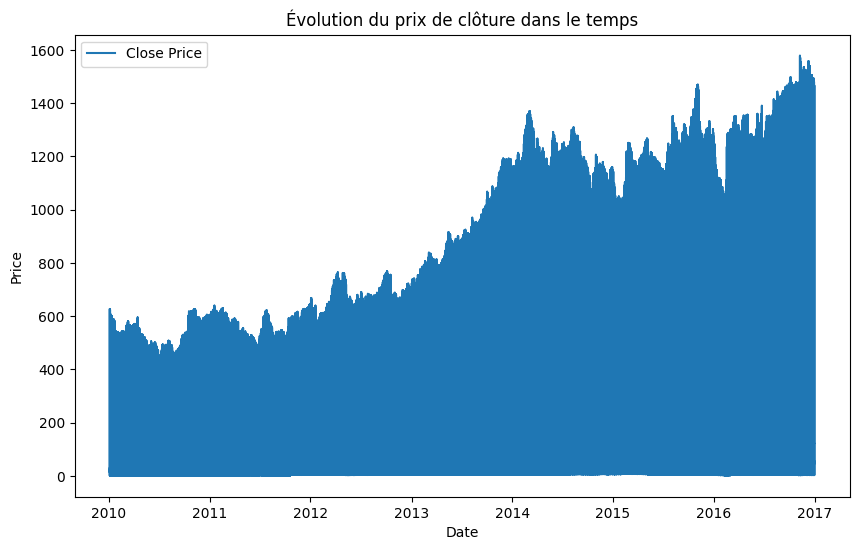

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Évolution du prix de clôture dans le temps')
plt.legend()
plt.show()

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [17]:
X = df[['open', 'low', 'high', 'volume']].values
y = df['close'].values


In [18]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Créer des DataLoaders pour l'entraînement et le test
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [21]:
class DNNRegressionModel(nn.Module):
    def __init__(self):
        super(DNNRegressionModel, self).__init__()
        self.hidden1 = nn.Linear(4, 64)   # Couche cachée avec 64 neurones
        self.hidden2 = nn.Linear(64, 32)  # Deuxième couche cachée avec 32 neurones
        self.hidden3 = nn.Linear(32, 16)  # Troisième couche cachée avec 16 neurones
        self.output = nn.Linear(16, 1)    # Couche de sortie pour prédire une valeur continue
        self.relu = nn.ReLU()             # Fonction d'activation ReLU

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        return x

model = DNNRegressionModel()

In [22]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
num_epochs = 100
for epoch in range(num_epochs):
    # Entraînement
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()           # Réinitialiser les gradients
        y_pred = model(X_batch)         # Prédictions
        loss = criterion(y_pred, y_batch)  # Calcul de la perte
        loss.backward()                 # Backpropagation
        optimizer.step()                # Mise à jour des poids

    # Évaluation
    model.eval()
    with torch.no_grad():
        train_loss = sum(criterion(model(X_batch), y_batch) for X_batch, y_batch in train_loader) / len(train_loader)
        test_loss = sum(criterion(model(X_batch), y_batch) for X_batch, y_batch in test_loader) / len(test_loader)

    print(f'Époque [{epoch+1}/{num_epochs}], Perte Entraînement : {train_loss:.4f}, Perte Test : {test_loss:.4f}')


Époque [1/100], Perte Entraînement : 3.6599, Perte Test : 3.6576
Époque [2/100], Perte Entraînement : 0.7125, Perte Test : 0.7056
Époque [3/100], Perte Entraînement : 0.7487, Perte Test : 0.7474
Époque [4/100], Perte Entraînement : 0.6232, Perte Test : 0.6262
Époque [5/100], Perte Entraînement : 0.5420, Perte Test : 0.5458
Époque [6/100], Perte Entraînement : 22.0595, Perte Test : 22.1373
Époque [7/100], Perte Entraînement : 1.8360, Perte Test : 1.8468
Époque [8/100], Perte Entraînement : 0.4714, Perte Test : 0.4765
Époque [9/100], Perte Entraînement : 1.4074, Perte Test : 1.4146
Époque [10/100], Perte Entraînement : 0.8767, Perte Test : 0.8834
Époque [11/100], Perte Entraînement : 0.6715, Perte Test : 0.6761
Époque [12/100], Perte Entraînement : 0.4469, Perte Test : 0.4517
Époque [13/100], Perte Entraînement : 0.6477, Perte Test : 0.6538
Époque [14/100], Perte Entraînement : 1.0327, Perte Test : 1.0407
Époque [15/100], Perte Entraînement : 1.0536, Perte Test : 1.0580
Époque [16/100], 

In [24]:
pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 15.9 MB/s eta 0:00:00


In [26]:
class DNNRegressionModel(nn.Module):
    def __init__(self, input_dim=4, hidden1_size=64, hidden2_size=32, hidden3_size=16):
        super(DNNRegressionModel, self).__init__()
        self.hidden1 = nn.Linear(input_dim, hidden1_size)
        self.hidden2 = nn.Linear(hidden1_size, hidden2_size)
        self.hidden3 = nn.Linear(hidden2_size, hidden3_size)
        self.output = nn.Linear(hidden3_size, 1)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = self.output(x)
        return x

In [27]:
# Créer une instance du modèle pour skorch
net = NeuralNetRegressor(
    DNNRegressionModel,
    max_epochs=50,
    lr=0.001,
    optimizer=torch.optim.Adam,
    iterator_train__shuffle=True,
)

In [28]:
# Définir la grille des hyperparamètres à tester
param_grid = {
    'lr': [0.001, 0.01, 0.1],                     # Différents taux d'apprentissage
    'max_epochs': [50, 100, 150],                 # Différents nombres d'époques
    'module__hidden1_size': [32, 64, 128],        # Nombre de neurones dans la première couche cachée
    'module__hidden2_size': [16, 32, 64],         # Nombre de neurones dans la deuxième couche cachée
    'module__hidden3_size': [8, 16, 32],          # Nombre de neurones dans la troisième couche cachée
    'optimizer': [torch.optim.Adam, torch.optim.SGD]  # Test de différents optimiseurs
}


In [32]:
# Convertir les données en float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
# Définir la métrique de performance (ici MSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Exécuter la recherche de grille
grid_search = GridSearchCV(net, param_grid, scoring=scorer, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)
print("Erreur quadratique moyenne de validation :", -grid_search.best_score_)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


In [ ]:
import matplotlib.pyplot as plt

# Listes pour stocker les pertes par époque
train_losses = []
test_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    # Entraînement
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_losses.append(epoch_train_loss / len(train_loader))

    # Validation (test)
    model.eval()
    with torch.no_grad():
        epoch_test_loss = 0
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            epoch_test_loss += loss.item()
        test_losses.append(epoch_test_loss / len(test_loader))

# Tracer les graphes de perte (Loss / Epochs)
plt.figure(figsize=(12, 5))

# Graphique de la perte pour l'entraînement et le test
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss / Epochs for Training and Test Data')
plt.legend()
plt.show()
